## Imports

In [22]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

In [23]:
np.set_printoptions(precision=4)

# Illustration of Python lists vs. Numpy arrays

In [24]:
print("Python list operations:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a + b)
try:
    print(a * b)
except TypeError:
    print("a*b has no meaning for Python lists")
print()
print("Numpy array operations:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a + b)
print("a*b:", a * b)

Python list operations:
a+b: [1, 2, 3, 4, 5, 6]
a*b has no meaning for Python lists

Numpy array operations:
a+b: [5 7 9]
a*b: [ 4 10 18]


In [25]:
a = np.array([[1,2,3],
              [4,5,6]]) 
print(a)

[[1 2 3]
 [4 5 6]]


In [26]:
b = np.array([10,20,30])
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


In [27]:
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0): [5 7 9]
a.sum(axis=1): [ 6 15]


# Basic functions

In [28]:
import numpy as np

def square(x: np.ndarray) -> np.ndarray:
    '''
    Square each element in the input ndarray.
    
    This function takes an ndarray as input and computes the square of each element.
    The squaring operation is vectorized and efficient, leveraging numpy's power function,
    which raises each element of the array to the power of 2.
    
    Parameters:
        x (ndarray): A numpy array of any shape containing numeric data.
    
    Returns:
        ndarray: A new ndarray with each element squared.
    '''
    return np.power(x, 2)

def leaky_relu(x: np.ndarray) -> np.ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    
    The Leaky ReLU (Rectified Linear Unit) is a type of activation function commonly used in neural networks,
    especially in situations where ReLU could cause neurons to die (when inputs are negative).
    Unlike ReLU, which outputs zero for any negative input, Leaky ReLU allows a small, positive gradient
    when the input is negative (0.2*x in this case).
    
    Parameters:
        x (ndarray): A numpy array of any shape.
    
    Returns:
        ndarray: An array where each input element `x[i]` is transformed to `max(0.2*x[i], x[i])`.
    '''
    return np.maximum(0.2 * x, x)


In [29]:
# IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/images/01_foundations/'
# PDF_IMG_FOLDER_PATH = '/Users/seth/development/01_deep-learning-from-scratch/pdf_images/01_foundations/'

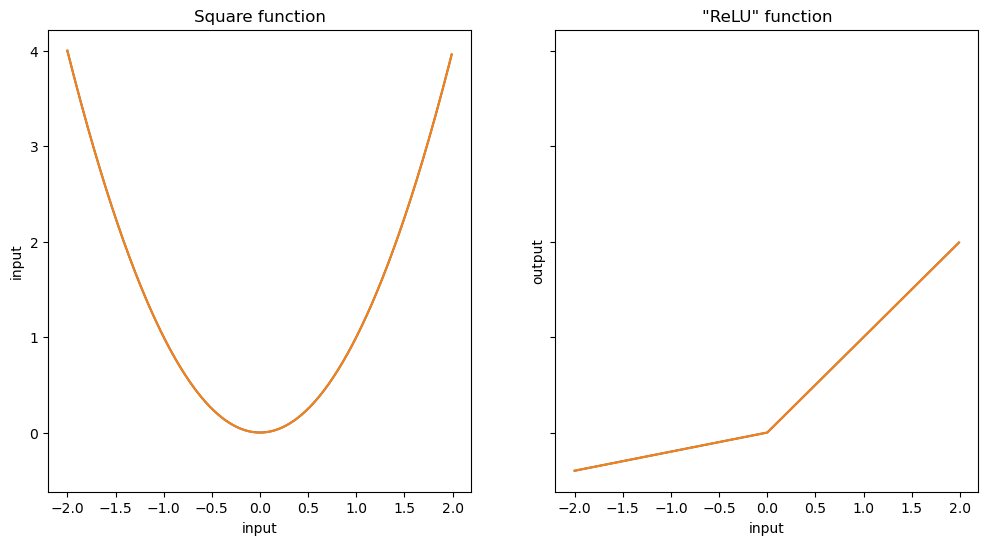

In [30]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');
# plt.savefig(IMG_FOLDER_PATH + "01_two_functions.png")
# plt.savefig(PDF_IMG_FOLDER_PATH + "01_two_functions.pdf")

In [31]:
from typing import Callable
import numpy as np
from numpy import ndarray

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array using the central difference method.

    The central difference method approximates the derivative of a function at a point by taking the average rate of change around the point.
    This is done by evaluating the function at slightly increased and decreased values of each input point, and then calculating the difference quotient.

    Parameters:
        func (Callable[[ndarray], ndarray]): The function for which the derivative is to be computed. This function should accept a numpy array and return a numpy array of the same shape.
        input_ (ndarray): A numpy array containing the points at which the derivative of the function should be evaluated.
        diff (float): The small change to apply to the input values to calculate the derivative. The default value is 0.001, which provides a good balance between accuracy and numerical stability.

    Returns:
        ndarray: A numpy array containing the derivative of the function at each point in "input_". The output array will have the same shape as "input_".

    Example:
        If `func` is the square function, `deriv(np.square, np.array([1, 2, 3]))` will compute the derivative at 1, 2, and 3, which are 2, 4, and 6, respectively.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)


# `Chain`

In [32]:
from typing import List, Callable
from numpy import ndarray

# Type alias for a function that takes a numpy ndarray as an input and returns an ndarray.
# This type is useful for defining functions that perform operations like mathematical transformations
# on entire arrays, such as applying activation functions in neural networks or any array-based computation.
Array_Function = Callable[[ndarray], ndarray]

# Type alias for a list of Array_Functions. This represents a sequence of operations (or functions) that are applied in order.
# In the context of neural networks, this could be used to represent a chain of layers or transformations 
# through which an input array is passed sequentially. Each function in the list processes the array and passes it to the next.
Chain = List[Array_Function]


In [33]:
from typing import List
from numpy import ndarray
from typing import Callable

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

def chain_length_2(chain: Chain, x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".

    This function is designed to process an input array `x` through two successive functions specified in `chain`.
    The functions in `chain` must be compatible in terms of input and output types, as the output of the first
    function becomes the input of the second function.

    Parameters:
        chain (Chain): A list of two functions that accept an ndarray as input and return an ndarray as output.
                       It is crucial that the list contains exactly two functions as the function explicitly checks for this.
        x (ndarray): The input ndarray to be processed through the chain of functions.

    Returns:
        ndarray: The result of processing `x` through the two functions in `chain`.

    Raises:
        AssertionError: If the length of `chain` is not exactly 2.

    Example:
        # Assuming the definitions of some Array_Functions that perform operations on an ndarray
        def square(x):
            return x**2

        def increment(x):
            return x + 1

        # Creating a chain of these functions
        chain_example = [square, increment]
        
        # Example ndarray
        input_array = np.array([1, 2, 3])
        
        # Processing the input_array through the chain
        output_array = chain_length_2(chain_example, input_array)
        # output_array will be [2, 5, 10], because each element is first squared then incremented
    '''
    assert len(chain) == 2, "Length of input 'chain' should be 2"  # Ensures the chain has exactly two functions

    f1 = chain[0]  # First function in the chain
    f2 = chain[1]  # Second function in the chain

    return f2(f1(x))  # Apply the first function, then feed the result into the second function



- **Error Handling**: The function starts with an assertion to check that the length of the `chain` is exactly two. This is crucial because the function logic explicitly depends on there being exactly two functions to apply in sequence.
  
- **Function Application**: It retrieves the first and second functions from the list and applies them in order. This is done by passing the input `x` to the first function `f1`, and then passing the result of `f1` to the second function `f2`.

- **Use Case**: This function is particularly useful in scenarios where you need to apply a fixed sequence of operations that is relatively simple (just two steps). For instance, in preprocessing steps of a machine learning workflow where you might want to apply a transformation followed by a normalization.

This structure makes your code clean and the logic behind its operations clear, making it easily maintainable and extendable.

## Chain derivative

In [34]:
import numpy as np
from numpy import ndarray

def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    
    This function takes a numpy ndarray as input and computes the square of each element.
    The squaring operation is performed element-wise across the array, which means that each element
    in the array is squared independently.

    Parameters:
        x (ndarray): A numpy array of any shape containing numeric data.

    Returns:
        ndarray: A new ndarray where each element is the square of the corresponding element in the input array.

    Example:
        # Example usage:
        input_array = np.array([1, 2, 3])
        output_array = square(input_array)
        # output_array will be [1, 4, 9]
    '''
    return np.power(x, 2)  # Use numpy's power function to raise each element to the power of 2

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.

    The sigmoid function is a common activation function used in neural networks, particularly
    in logistic regression and binary classification models. It maps any real-valued number into
    the range (0, 1), making it useful for models where we need to predict probabilities.

    The sigmoid function is defined as:
    S(x) = 1 / (1 + exp(-x))

    Parameters:
        x (ndarray): A numpy array of any shape.

    Returns:
        ndarray: An array where each input element x[i] is transformed to 1 / (1 + exp(-x[i])).

    Example:
        # Example usage:
        input_array = np.array([-1, 0, 1])
        output_array = sigmoid(input_array)
        # output_array will be approximately [0.268, 0.5, 0.731]
    '''
    return 1 / (1 + np.exp(-x))  # Apply the sigmoid function element-wise


- **`square` function**: It uses `np.power`, which is a versatile function capable of raising each element of an array to a specified power. Here, each element is squared.
  
- **`sigmoid` function**: This function implements the sigmoid activation function, which is widely used in the fields of neural networks and machine learning for transforming values into probabilities. The computation `1 / (1 + np.exp(-x))` efficiently transforms each element of `x` according to the sigmoid formula.

These functions are vectorized, meaning they're optimized for fast operation over numpy arrays, making them suitable for large datasets and computational tasks typical in data science and machine learning applications.

In [35]:
import numpy as np
from numpy import ndarray
from typing import Callable, List

# A Function that takes in an ndarray and returns an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of these Array_Functions
Chain = List[Array_Function]

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array using the central difference method.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

def chain_deriv_2(chain: Chain, input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)

    This function specifically requires a list of exactly two functions (f1 and f2) and computes their derivatives
    using the chain rule. The output is the derivative of the composite function at each point in the input range.

    Parameters:
        chain (Chain): A list of two functions, where each function accepts an ndarray and returns an ndarray.
                       The list must be exactly two functions long.
        input_range (ndarray): A one-dimensional numpy array representing the range of input values over which to evaluate the derivative.

    Returns:
        ndarray: A numpy array of derivatives for the composite function across the input range.

    Raises:
        AssertionError: If the length of the chain is not 2 or if the input_range is not a one-dimensional array.

    Example:
        # Define two functions
        def square(x):
            return x ** 2
        def increment(x):
            return x + 1

        # Create a chain of these functions
        chain_example = [square, increment]

        # Calculate derivative over an input range
        input_values = np.array([1, 2, 3])
        derivatives = chain_deriv_2(chain_example, input_values)
        # This will output the derivative of increment(square(x)) over the input_values
    '''

    assert len(chain) == 2, "This function requires 'Chain' objects of length 2"
    assert input_range.ndim == 1, "Function requires a 1-dimensional ndarray as input_range"

    f1 = chain[0]  # First function in the chain
    f2 = chain[1]  # Second function in the chain

    # f1(x)
    f1_of_x = f1(input_range)

    # df1/dx - derivative of the first function with respect to x
    df1dx = deriv(f1, input_range)

    # df2/du evaluated at f1(x) - derivative of the second function with respect to u
    df2du = deriv(f2, f1_of_x)

    # Multiplying these derivatives together at each point according to the chain rule
    return df1dx * df2du


- **`assert` Statements**: Your function starts with two assertions to ensure that the input constraints are met — specifically, that `chain` contains exactly two functions, and that `input_range` is a one-dimensional array. These assertions help prevent runtime errors by catching incorrect inputs early in the function's execution.

- **Chain Rule Application**: The function applies the chain rule by first computing the derivative of the first function \( f1 \) with respect to its input \( x \), and then the derivative of the second function \( f2 \) with respect to the output of \( f1(x) \). These derivatives are then multiplied together at each input point to get the derivative of the composite function across the input range.

- **Function Generality**: Although this function is tailored for two functions, the technique can be extended to longer chains by nesting more calls to `deriv` and applying the product of derivatives appropriately. This would be useful in deeper computational graphs common in machine learning and numerical simulations.

In [36]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [37]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

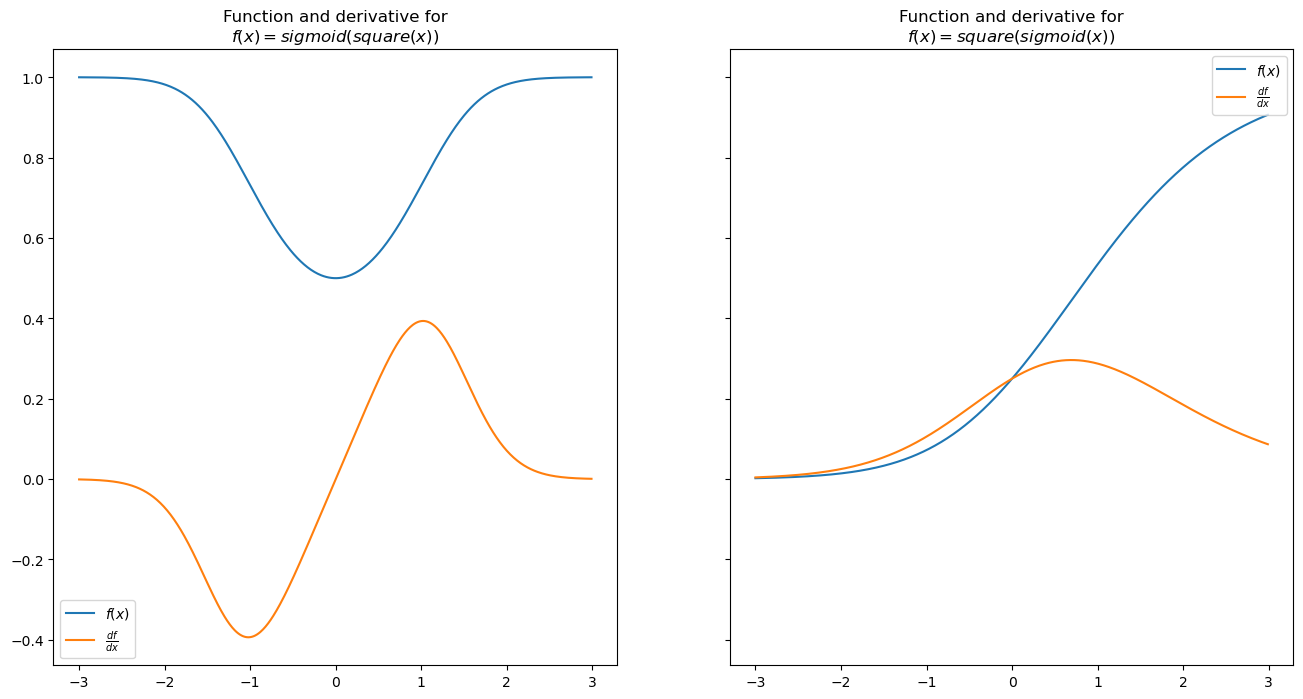

In [38]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# plt.savefig(IMG_FOLDER_PATH + "08_plot_chain_rule_1.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "08_plot_chain_rule_1.pdf");

# `Chain of length 3`

In [39]:
import numpy as np
from numpy import ndarray
from typing import Callable, List

# A Function that takes in an ndarray and returns an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of these Array_Functions
Chain = List[Array_Function]

def chain_length_3(chain: Chain, x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".

    This function is designed to process an input array `x` through three successive functions specified in the `chain`.
    It requires the `chain` to contain exactly three functions, each of which takes an ndarray as input and returns an ndarray as output.

    Parameters:
        chain (Chain): A list of three functions that accept an ndarray as input and return an ndarray as output.
        x (ndarray): The input ndarray to be processed through the chain of functions.

    Returns:
        ndarray: The result of processing `x` through the three functions in the `chain`.

    Raises:
        AssertionError: If the length of `chain` is not exactly 3.

    Example:
        # Assuming the definitions of some Array_Functions that perform operations on an ndarray
        def double(x):
            return x * 2
        def increment(x):
            return x + 1
        def square(x):
            return x ** 2

        # Creating a chain of these functions
        chain_example = [double, increment, square]
        
        # Example ndarray
        input_array = np.array([1, 2, 3])
        
        # Processing the input_array through the chain
        output_array = chain_length_3(chain_example, input_array)
        # output_array will be [16, 36, 64], because each element is first doubled, incremented, and then squared
    '''
    assert len(chain) == 3, "Length of input 'chain' should be 3"  # Ensures the chain has exactly three functions

    f1 = chain[0]  # First function in the chain
    f2 = chain[1]  # Second function in the chain
    f3 = chain[2]  # Third function in the chain

    # Sequentially apply f1, f2, and f3 to the input
    return f3(f2(f1(x)))  # Apply the first function, then the second, then the third


- **Sequential Function Application**: The function takes an array `x` and applies the first function `f1` to it. The result is then passed to the second function `f2`, and the result of `f2` is finally passed to the third function `f3`. The overall output is the result of this sequential application of three functions.
- **Error Handling**: The function begins with an assertion to ensure that the list `chain` contains exactly three functions. This is crucial for avoiding errors during execution if an incorrect chain length is provided.
- **Use Case**: This function is very useful in scenarios where a fixed sequence of transformations needs to be applied to data, such as in preprocessing pipelines, or when configuring layers in a neural network where each layer represents a different transformation or activation function. 

By thoroughly documenting the function's purpose, parameters, and expected behavior, you help ensure that it is clear and usable both for current projects and future re-use or modification.

In [40]:
import numpy as np
from numpy import ndarray
from typing import Callable, List

# A Function that takes in an ndarray and returns an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of these Array_Functions
Chain = List[Array_Function]

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array using the central difference method.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

def chain_deriv_3(chain: Chain, input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1(x))))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)

    This function calculates the derivative of a composition of three functions applied in sequence.
    The result is obtained by multiplying the derivatives of each function evaluated at the appropriate points
    using the chain rule of calculus.

    Parameters:
        chain (Chain): A list of three functions that accept an ndarray as input and return an ndarray as output.
                       The list must contain exactly three functions.
        input_range (ndarray): A one-dimensional numpy array representing the range of input values over which to evaluate the derivative.

    Returns:
        ndarray: A numpy array containing the derivatives of the composite function at each point in the input range.

    Raises:
        AssertionError: If the length of 'chain' is not exactly 3, or if the input range is not a one-dimensional array.

    Example:
        # Define three functions
        def square(x):
            return x ** 2
        def increment(x):
            return x + 1
        def cube(x):
            return x ** 3

        # Create a chain of these functions
        chain_example = [square, increment, cube]

        # Calculate derivative over an input range
        input_values = np.array([1, 2, 3])
        derivatives = chain_deriv_3(chain_example, input_values)
        # This will compute the derivative of the composition of these functions over the input values
    '''
    assert len(chain) == 3, "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]  # First function in the chain
    f2 = chain[1]  # Second function in the chain
    f3 = chain[2]  # Third function in the chain

    # Compute f1(x)
    f1_of_x = f1(input_range)

    # Compute f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # Derivative of f3 with respect to its input, evaluated at f2(f1(x))
    df3du = deriv(f3, f2_of_x)

    # Derivative of f2 with respect to its input, evaluated at f1(x)
    df2du = deriv(f2, f1_of_x)

    # Derivative of f1 with respect to x
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point according to the chain rule
    return df1dx * df2du * df3du


- **Chain Rule Application**: The function applies the chain rule to a sequence of three nested functions, multiplying the derivatives at each necessary point. This is critical for computing how changes in the input affect the output through multiple transformation stages.
- **Assertion Checks**: Ensures that the function only proceeds with a valid input length for the chain, avoiding logical errors that would occur if fewer or more functions were provided.
- **Function Flexibility**: This structure allows you to calculate derivatives across various applications, especially in automated differentiation tasks needed in optimization and deep learning.

By providing a thorough explanation in the comments, the function's purpose and usage are made clear, improving maintainability and understandability of the code.

In [41]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray
    '''
    return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply "sigmoid" function to each element in ndarray
    '''
    return 1 / (1 + np.exp(-x))

In [42]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from typing import Callable, List

# Define the type for a function that processes ndarrays and returns ndarrays
Array_Function = Callable[[ndarray], ndarray]

# Define the type for a list of such functions
Chain = List[Array_Function]

def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots the output of a function chain over a given input range using Matplotlib.

    This function applies a series of transformations defined in `chain` to `input_range` and
    plots the resulting output on the provided Matplotlib Axes object (`ax`). The chain can
    consist of 2 or 3 functions depending on the `length` argument.

    Parameters:
        ax (matplotlib.axes.Axes): The Matplotlib subplot (Axes object) to use for plotting.
        chain (Chain): A list of functions where each function accepts an ndarray as input 
                       and returns an ndarray as output. This chain represents the sequence of 
                       function applications.
        input_range (ndarray): A one-dimensional numpy array of values over which to evaluate the chain.
        length (int, optional): The length of the function chain to be applied. Supports values 2 or 3.
                                Default is 2.

    Raises:
        AssertionError: If `input_range` is not a one-dimensional array.
        ValueError: If `length` is not 2 or 3, as these are the only supported chain lengths.

    Example:
        # Define two functions for the chain
        def square(x):
            return x ** 2
        def increment(x):
            return x + 1
        
        # Create an Axes object
        fig, ax = plt.subplots()
        
        # Input range
        input_values = np.linspace(-10, 10, 400)
        
        # Define the chain and plot
        chain_example = [square, increment]
        plot_chain(ax, chain_example, input_values)
        
        # Display the plot
        plt.show()
    '''
    
    # Check that input range is one-dimensional
    assert input_range.ndim == 1, "Function requires a 1-dimensional ndarray as input_range"
    
    # Apply the chain function of the appropriate length and compute the output range
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    else:
        raise ValueError("Unsupported chain length. Supported lengths are 2 and 3.")
    
    # Plot the input range against the output range on the provided Axes object
    ax.plot(input_range, output_range, label=f'Output of chain of length {length}')
    ax.set_xlabel('Input Range')
    ax.set_ylabel('Output Range')
    ax.legend()  # Optionally include a legend


Your function `plot_chain` is designed to plot the output of a composite function (a chain of functions) applied over a specified input range. This function integrates with Matplotlib for visualization and is capable of handling chains of length 2 or 3, as specified by the `length` parameter. 
### Key Features of the `plot_chain` Function:
- **Flexibility**: It can handle chains of different lengths (2 or 3), making it versatile for various use cases.
- **Visualization**: It plots the relationship between the input and the output of the function chain, providing visual insights into the behavior of composite functions.
- **Error Handling**: It ensures that the input range is appropriate and that the function chain length is supported, enhancing robustness.
- **Integration with Matplotlib**: This function is designed to be used directly with Matplotlib, a popular library for creating static, interactive, and animated visualizations in Python.

By integrating clear documentation, parameter descriptions, and example usage, you make the function easier to understand and utilize effectively within various computational or analytical contexts.

In [43]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from typing import Callable, List

# Define the type for a function that processes ndarrays and returns ndarrays
Array_Function = Callable[[ndarray], ndarray]

# Define the type for a list of such functions
Chain = List[Array_Function]

def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> None:
    '''
    Uses the chain rule to plot the derivative of a chain of nested functions over a given input range using Matplotlib.

    This function calculates the derivative of the output of a function chain, given an input range, and then plots
    this derivative on the provided Matplotlib Axes object (`ax`). It supports chains of length 2 or 3.

    Parameters:
        ax (matplotlib.axes.Axes): The Matplotlib subplot (Axes object) to use for plotting.
        chain (Chain): A list of functions where each function accepts an ndarray as input and returns an ndarray as output.
                       The chain represents a sequence of function applications whose derivative will be computed and plotted.
        input_range (ndarray): A one-dimensional numpy array of values over which to evaluate and plot the chain's derivative.
        length (int, optional): The length of the function chain to apply. It supports values 2 or 3, indicating the number of
                                functions in the chain. Default is 2.

    Raises:
        AssertionError: If `input_range` is not a one-dimensional array.
        ValueError: If `length` is not 2 or 3, as these are the only supported chain lengths for derivative computation.

    Example:
        # Define three functions for the chain
        def square(x):
            return x ** 2
        def increment(x):
            return x + 1
        def cube(x):
            return x ** 3
        
        # Create an Axes object
        fig, ax = plt.subplots()
        
        # Input range
        input_values = np.linspace(-3, 3, 400)
        
        # Define the chain and plot its derivative
        chain_example = [square, increment, cube]
        plot_chain_deriv(ax, chain_example, input_values, length=3)
        
        # Display the plot
        plt.show()
    '''
    
    # Apply the chain derivative function of the appropriate length and compute the derivative over the input range
    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    else:
        raise ValueError("Unsupported chain length. Supported lengths are 2 and 3.")
    
    # Plot the input range against the derivative values on the provided Axes object
    ax.plot(input_range, output_range, label=f'Derivative of chain of length {length}')
    ax.set_xlabel('Input Range')
    ax.set_ylabel('Derivative')
    ax.legend()  # Optionally include a legend


Your function `plot_chain_deriv` plots the derivative of a sequence of functions (a chain) applied over a specified input range, using Matplotlib for visualization. It can handle chains of two or three functions, depending on the `length` parameter. Here’s an enhanced explanation and comment for this function, which you can use directly in your code documentation:

### Key Features of the `plot_chain_deriv` Function:
- **Functional Flexibility**: It can calculate and plot derivatives for chains of different lengths, making it versatile for various computational scenarios.
- **Visualization**: It plots the relationship between the input and the derivative of the output of the function chain, providing visual insights into how the output rate of change varies with the input.
- **Error Handling**: It checks for appropriate chain lengths and ensures that the input conforms to expectations, enhancing the robustness and reliability of the function.
- **Matplotlib Integration**: This function is designed to be used directly with Matplotlib, facilitating the creation of plots that are both informative and visually appealing.

By providing clear documentation, parameter descriptions, and example usage, the function is made accessible and practical for users in computational and analytical contexts, especially in fields requiring visualization of mathematical or algorithmic properties.

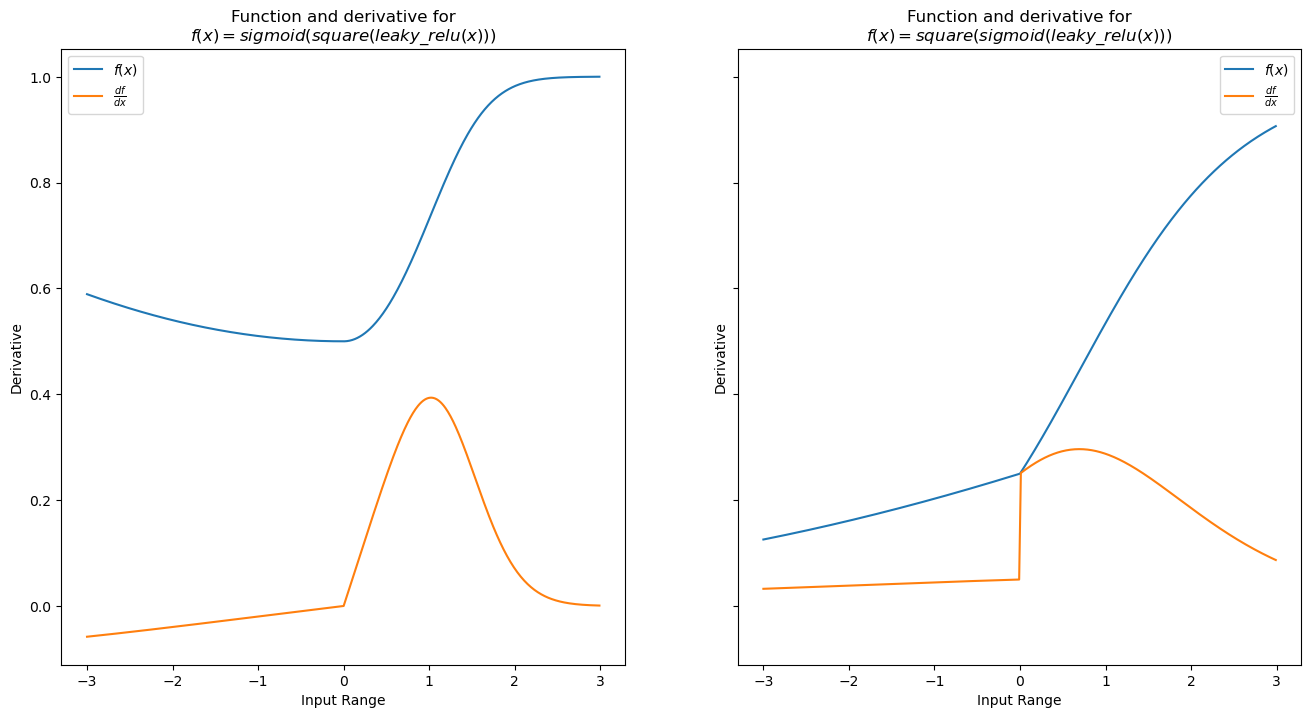

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the three functions used in the chains
def leaky_relu(x: np.ndarray) -> np.ndarray:
    return np.maximum(0.2 * x, x)

def square(x: np.ndarray) -> np.ndarray:
    return np.power(x, 2)

def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

# Setting up the figure and axes for plotting
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 1 row, 2 columns, shared y-axis

# Define the function chains
chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

# Define the range over which the functions will be plotted
PLOT_RANGE = np.arange(-3, 3, 0.01)

# Plotting the first chain and its derivative on the first subplot
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

# Setting legends and titles for clarity
ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leaky\\_relu(x)))$")

# Plotting the second chain and its derivative on the second subplot
plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)

# Setting legends and titles for clarity
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leaky\\_relu(x)))$")

# Displaying the plot
plt.show()

# Uncomment the following lines to save the figure as PNG and PDF
# plt.savefig("path/to/folder/09_plot_chain_rule_2.png")
# plt.savefig("path/to/folder/09_plot_chain_rule_2.pdf")


# Function with multiple inputs example

In [45]:
import numpy as np
from numpy import ndarray
from typing import Callable

# Define the type for a function that processes ndarrays and returns an ndarray
Array_Function = Callable[[ndarray], ndarray]

def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Computes the forward pass of a function that takes two input arrays, adds them, 
    and then applies a specified activation function to the result.

    This function is a basic example of how element-wise operations and function 
    applications are combined in neural network layers. The addition simulates combining 
    inputs, and the activation function applies a non-linear transformation, which is 
    crucial for learning complex patterns in data.

    Parameters:
        x (ndarray): The first input numpy array. Must have the same shape as y.
        y (ndarray): The second input numpy array. Must have the same shape as x.
        sigma (Array_Function): The activation function to apply after adding the inputs. 
                                This function must accept a numpy array and return a numpy array.

    Returns:
        float: The sum of the elements of the numpy array resulting from the activation function,
               effectively scalarizing the output for further processing or loss calculation.

    Raises:
        AssertionError: If the input arrays x and y do not have the same shape.

    Example:
        # Define a simple activation function
        def relu(z):
            return np.maximum(0, z)
        
        # Input arrays
        x_input = np.array([1, 2, 3])
        y_input = np.array([4, 5, 6])
        
        # Compute the forward pass
        result = multiple_inputs_add(x_input, y_input, relu)
        # The result will be the sum of applying the relu activation function to each element of the array [5, 7, 9]
    '''
    assert x.shape == y.shape, "Input shapes must match"

    # Element-wise addition of the two input arrays
    a = x + y

    # Application of the activation function to the sum of the inputs
    activated_a = sigma(a)

    # Return the sum of the activated array elements as a single float
    return float(np.sum(activated_a))


Your function `multiple_inputs_add` performs a forward pass through a simple computational model that takes two arrays, adds them, and then applies an activation function (`sigma`). This kind of function is common in machine learning, especially in neural networks where combining layers and applying non-linearities is standard. Here’s a detailed commentary suitable for inclusion in your code:

- **Error Handling**: It checks that the input arrays `x` and `y` have the same shape, ensuring valid element-wise operations.
- **Activation Function**: The function `sigma` is applied to the result of the array addition, demonstrating how non-linearities are introduced in neural network computations.
- **Output**: The function returns the sum of the activated array, which might be used in scenarios where scalar output is necessary, such as in loss calculations.
- **Documentation**: The documentation provides clear instructions on how the function works, its requirements, and an example usage, making it user-friendly and easy to understand.

This setup is typical in forward propagation in neural networks where inputs from different layers or sources are combined and passed through activation functions to contribute to the learning process.

In [46]:
def multiple_inputs_add_backward(x: ndarray,
                                 y: ndarray,
                                 sigma: Array_Function) -> float:
    '''
    Computes the derivative of this simple function with respect to
    both inputs
    '''
    # Compute "forward pass"
    a = x + y

    # Compute derivatives
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

# Function with matrix multiplication

In [47]:
def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    '''
    Computes the forward pass of a matrix multiplication
    '''
    
    assert X.shape[1] == W.shape[0], \
    '''
    For matrix multiplication, the number of columns in the first array should match the
    number of rows in the second, instead the number of columns in the first array is {0}
    and the number of rows in the second array is {1}
    '''.format(X.shape[1], W.shape[0])

    # matrix multiplication
    N = np.dot(X, W)

    return N

In [48]:
def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    Computes the backward pass of a matrix multiplication with respect to the first argument.
    '''

    # backward pass
    dNdX = np.transpose(W, (1, 0))

    return dNdX

In [49]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)
matmul_backward_first(X, W)

[[ 0.4723  0.6151 -1.7262]]


array([[ 0.9282, -0.6075, -1.2214]])

In [50]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving matrix multiplication, one extra function
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    return S

# Derivative of a function with matrix multiplication

If: 

* $X$ is $m x n$
* $W$ is $n x p$

Then $X * W$ will be $m x p$:

If the derivative of a loss with respect to each output $N$ is $m x p$, then

* $\frac{\partial N}{\partial X} = N * W^T$ (`np.dot((m,p), (p,n)) = m x n`
* $\frac{\partial N}{\partial W} = X^T * N$ (`np.dot((n,m), (m,p)) = n x p`

In particular, the matrix multiplication on the backward pass must be done in this order.

In [51]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

In [52]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.0852 -0.0557 -0.1121]]


In [53]:
def forward_test(ind1, ind2, inc):
    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

In [54]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01

array([[-0.11]])

In [55]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)

-0.11

Same! Gradients check.

# Matrix function with sum

In [56]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [57]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of this function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W.transpose(0, 1))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

# Matrix function with two 2D matrices

In [58]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [59]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # note: I'll refer to the derivatives by their quantities here,
    # unlike the math where we referred to their function names

    # dLdS - just 1s
    dLdS = np.ones_like(S)

    # dSdN
    dSdN = deriv(sigma, N)
    
    # dLdN
    dLdN = dLdS * dSdN

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

#### Testing

In [60]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)

print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]
L:
2.3755

dLdX:
[[ 0.2489 -0.3748  0.0112]
 [ 0.126  -0.2781 -0.1395]
 [ 0.2299 -0.3662 -0.0225]]


In [61]:
X1 = X.copy()
X1[0, 0] += 0.001

print(round(
        (matrix_function_forward_sum(X1, W, sigmoid) - \
         matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


Same again!

### Plotting

In [62]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    '''
    Computing the result of the forward pass of this function with
    input Tensors X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]
    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11

    # matrix multiplication
    N = np.dot(X1, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [63]:
print("X:")
print(X)

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]


In [64]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

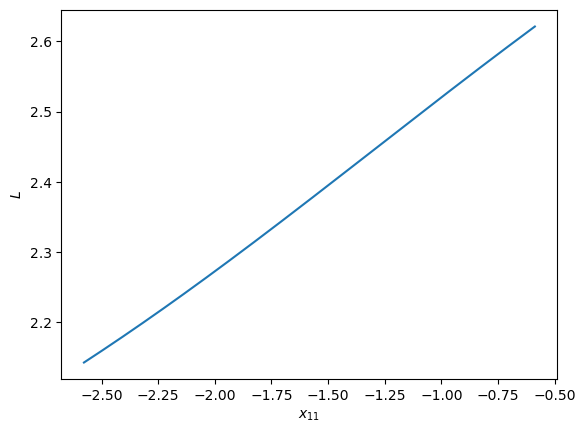

In [65]:
plt.plot(x11s, Ls);
# plt.title("Value of $L$ as $x_{11}$ changes holding\nother values of $X$ and $W$ constant")
plt.xlabel("$x_{11}$")
plt.ylabel("$L$");
# plt.savefig(IMG_FOLDER_PATH + "18_x11_vs_L.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "18_x11_vs_L.pdf");